In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('50_sin_nulos_MexicoCity_DistritoFederal_Mexico.csv')
#Verificamos informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26582 non-null  int64  
 1   host_name                    26582 non-null  object 
 2   host_since                   26582 non-null  object 
 3   host_location                26582 non-null  object 
 4   host_response_time           26582 non-null  object 
 5   host_response_rate           26582 non-null  object 
 6   host_acceptance_rate         26582 non-null  object 
 7   host_is_superhost            26582 non-null  object 
 8   host_neighbourhood           26582 non-null  object 
 9   host_total_listings_count    26582 non-null  int64  
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [3]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

id                             0
host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
has_availa

In [4]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc[ : , [0, 9, 15, 16, 19, 20, 22, 23, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 49]]
cualitativas = data.iloc[ : , [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 21, 24, 25, 30, 38, 39, 47, 48]]

<Figure size 1500x800 with 0 Axes>

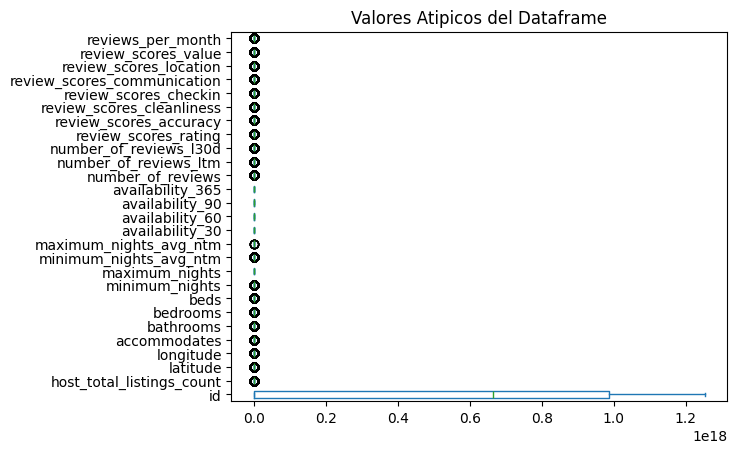

In [5]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize= (15, 8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show()  #Dibujamos el diagrama

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [6]:
#Metodo aplicando desviacion estandar. Encuentra los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                             1.997574e+18
host_total_listings_count      6.148874e+02
latitude                       1.953289e+01
longitude                     -9.906674e+01
accommodates                   1.043010e+01
bathrooms                      4.229628e+02
bedrooms                       2.290485e+02
beds                           4.256783e+02
minimum_nights                 8.183006e+01
maximum_nights                 1.793887e+03
minimum_nights_avg_ntm         7.949662e+01
maximum_nights_avg_ntm         2.102283e+03
availability_30                4.852387e+01
availability_60                9.733159e+01
availability_90                1.496068e+02
availability_365               6.026093e+02
number_of_reviews              2.711536e+02
number_of_reviews_ltm          7.505979e+01
number_of_reviews_l30d         6.823979e+00
review_scores_rating           5.790227e+00
review_scores_accuracy         5.861286e+00
review_scores_cleanliness      5.799032e+00
review

In [7]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data2 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data2

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,35797,1.0,19.383820,NaN,2.0,1.0,1.0,1.0,1.0,7.0,...,0.0,0.0,4.80,4.56,4.90,4.80,4.78,4.90,4.80,0.41
1,44616,13.0,19.411620,-99.177940,NaN,404.0,5.0,404.0,1.0,365.0,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,67703,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,70644,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,107078,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,279.0,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26578,1252159821531694005,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26579,1252185591721328995,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26580,1252218347521498445,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [8]:
#Corroboramos valores nulos
valores_nulos = data2.isnull().sum()
valores_nulos

id                               0
host_total_listings_count      380
latitude                       357
longitude                      712
accommodates                   526
bathrooms                        0
bedrooms                       866
beds                             0
minimum_nights                 190
maximum_nights                   1
minimum_nights_avg_ntm         184
maximum_nights_avg_ntm           7
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              608
number_of_reviews_ltm          432
number_of_reviews_l30d         511
review_scores_rating           408
review_scores_accuracy         434
review_scores_cleanliness      437
review_scores_checkin          310
review_scores_communication    453
review_scores_location         521
review_scores_value            467
reviews_per_month              398
dtype: int64

In [9]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia dela dataframe
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(), 1))
data_clean

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,35797,1.0,19.383820,-99.200000,2.0,1.0,1.0,1.0,1.0,7.0,...,0.0,0.0,4.80,4.56,4.90,4.80,4.78,4.90,4.80,0.41
1,44616,13.0,19.411620,-99.177940,3.1,404.0,5.0,404.0,1.0,365.0,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,67703,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,70644,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,107078,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,279.0,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26578,1252159821531694005,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26579,1252185591721328995,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26580,1252218347521498445,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [10]:
#Corroboramos valores nulos
valores_nulos = data_clean.isnull().sum()
valores_nulos

id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS DEL DATAFRAME**

In [11]:
#Metodo aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                             2.467577e+18
host_total_listings_count      3.950000e+01
latitude                       1.949409e+01
longitude                     -9.911773e+01
accommodates                   7.000000e+00
bathrooms                      3.500000e+00
bedrooms                       3.500000e+00
beds                           6.000000e+00
minimum_nights                 3.500000e+00
maximum_nights                 2.542500e+03
minimum_nights_avg_ntm         5.250000e+00
maximum_nights_avg_ntm         2.265000e+03
availability_30                6.350000e+01
availability_60                1.130000e+02
availability_90                1.625000e+02
availability_365               7.105000e+02
number_of_reviews              1.355000e+02
number_of_reviews_ltm          5.250000e+01
number_of_reviews_l30d         5.000000e+00
review_scores_rating           5.255000e+00
review_scores_accuracy         5.375000e+00
review_scores_cleanliness      5.265000e+00
review

In [12]:
#Obtenemos datos del dataframe
data2_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y>= Limite_Inferior_iqr)]
data2_iqr

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,35797,1.0,19.383820,NaN,2.0,1.0,1.0,1.0,1.0,7,...,0.0,0.0,4.80,4.56,4.90,4.80,4.78,4.90,4.80,0.41
1,44616,13.0,19.411620,-99.177940,NaN,NaN,NaN,NaN,1.0,365,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,67703,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,70644,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.0,NaN,180,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,107078,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,NaN,19.387329,NaN,4.0,1.0,2.0,2.0,1.0,45,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26578,1252159821531694005,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26579,1252185591721328995,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26580,1252218347521498445,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [13]:
#Corroboramos valores nulos
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

id                                0
host_total_listings_count      3764
latitude                       1779
longitude                      2845
accommodates                   1352
bathrooms                      3559
bedrooms                       1724
beds                           3419
minimum_nights                 3584
maximum_nights                    0
minimum_nights_avg_ntm         2023
maximum_nights_avg_ntm            7
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              2328
number_of_reviews_ltm          1318
number_of_reviews_l30d          813
review_scores_rating           1868
review_scores_accuracy         1694
review_scores_cleanliness      1987
review_scores_checkin          1184
review_scores_communication    2260
review_scores_location         1879
review_scores_value            1944
reviews_per_month              1023
dtype: int64

In [14]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2_iqr.mean(), 1))
data3_iqr 

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,35797,1.0,19.383820,-99.200000,2.0,1.0,1.0,1.0,1.0,7,...,0.0,0.0,4.80,4.56,4.90,4.80,4.78,4.90,4.80,0.41
1,44616,13.0,19.411620,-99.177940,2.9,1.4,1.4,1.8,1.0,365,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,67703,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,70644,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.0,1.6,180,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,107078,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,7.3,19.387329,-99.200000,4.0,1.0,2.0,2.0,1.0,45,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26578,1252159821531694005,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26579,1252185591721328995,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26580,1252218347521498445,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [15]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data3_iqr], axis = 1)
Datos_limpios

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,Not defined,f,Not specified,"['email', 'phone', 'work_email']",t,...,0.0,0.0,4.80,4.56,4.90,4.80,4.78,4.90,4.80,0.41
1,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,93%,t,Condesa,"['email', 'phone', 'work_email']",t,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,Nicholas,2011-01-04,"Mexico City, Mexico",within an hour,71%,57%,t,Hipódromo,"['email', 'phone']",t,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,Trisha,2010-08-24,"Mexico City, Mexico",within a few hours,100%,100%,t,Coyoacán,"['email', 'phone', 'work_email']",t,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,Andrea,2011-04-27,"Mexico City, Mexico",within an hour,100%,100%,t,Polanco,"['email', 'phone']",t,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,HostPal,2016-04-16,"Mexico City, Mexico",within an hour,100%,100%,t,Not specified,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26578,Luis Angel,2024-08-13,"Mexico City, Mexico",within an hour,100%,100%,f,Polanco,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26579,Luis Angel,2024-08-13,"Mexico City, Mexico",within an hour,100%,100%,f,Polanco,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
26580,Luis Angel,2024-08-13,"Mexico City, Mexico",within an hour,100%,100%,f,Polanco,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [16]:
#Corroboramos valores nulos
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
has_availability               0
first_review                   0
last_review                    0
license                        0
instant_bookable               0
id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds      

In [17]:
#Exportamos datos limpios a csv
Datos_limpios.to_csv("50_sin_nulos_ni_atipicos_MexicoCity_DistritoFederal_Mexico.csv")